1) Create the KNN classification algorithm using Python (do not use the sklearn package).

(2) Apply your KNN algorithm to the “Wine” data set. You can find the dataset from the sklearn
package or you can download the data set from UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/index.php).

(3) Find the 𝐾 value that achieves the best classification result on the “Wine” data set. Show
the curve of classification accuracy vs K value.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs

In [0]:
from sklearn.preprocessing import StandardScaler
data = datasets.load_wine()
X = data.data
y = data.target

X = StandardScaler().fit_transform(X)
print(np.unique(y))
print(X.shape)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25,random_state=2) 

In [0]:
print(X_test)

In [0]:
from scipy.stats import pearsonr
corr, _ = pearsonr(X_test[0], X_test[1])
print(corr)

0.6479007370281497


k = 2 achieves the lowest number of errors in this case


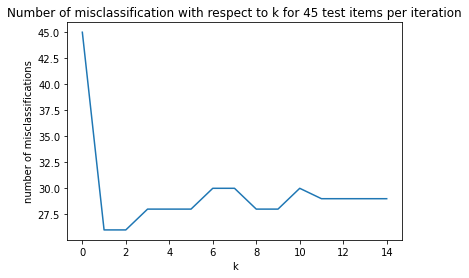

In [0]:
from collections import defaultdict

errors = []

def knn(k):
  D = []
  classes = {}
  err = 0
  for c in range(len(X_test)):
    for i in range(len(X_train)):
      corr,_ = pearsonr(X_test[c], X_train[i]) #use the pearson corr coef as distance measure
      D.append((abs(corr), X_train[i], Y_train[i]))
    D.sort(key = lambda x: x[0], reverse=True) #sort list of tuples by highest distance measure
    adict = defaultdict(int) #use a default dict to initialize dict with 0 in all elements
    max = 0
    correctClass = -1
    for j in range(k):
      adict[D[j][2]] += 1 # number of times this particular class appears for first k elements
      if max < adict[D[j][2]]:
        max = adict[D[j][2]]
        correctClass = D[j][2] #the correctClass is the class that appears the most in the training data
    classes[c] = correctClass 
    if correctClass != Y_test[c]:
      err +=1 #collect the number of times "correctClass" is incorrect
  errors.append(err)

for l in range(15):
  knn(l)

plt.plot(errors)
plt.xlabel('k')
plt.ylabel('number of misclassifications')
plt.title('Number of misclassification with respect to k for 45 test items per iteration')

print("k = 2 achieves the lowest number of errors in this case")